In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# Define a converter function to remove '%' and convert to float
def parse_percentage(val):
    try:
        return float(val.strip('%')) / 100
    except:
        return np.nan

percentage_columns = [col for col in df.columns if col != 'Time']  # Assuming 'Time' is your date column
converters = {col: parse_percentage for col in percentage_columns}

In [24]:
df = pd.read_csv('CPU Usage-data-as-joinbyfield-2025-02-26 13_24_46.csv', parse_dates=['Time'], converters=converters)
df.set_index('Time', inplace=True)

In [13]:
df

,jupyter-00f4e64e-2db741-2d4e14-2dbc41-2d6b9ae50cb69f - (spyglass),jupyter-01941c38-2db43e-2d4489-2d818b-2d08b9af59200f - (spyglass),jupyter-01c1180b-2d3299-2d4bcd-2dad5b-2db8fc79a3bfcf - (spyglass),jupyter-021ed73b-2d86d9-2d449d-2d9d4d-2d8f8ab56f75fd - (spyglass),jupyter-02ec3392-2d0630-2d4e3f-2d83a9-2d8a9e8b622e27 - (spyglass),jupyter-0431084b-2d884a-2d4bc0-2d9c46-2d00ea4553031a - (spyglass),jupyter-04667a34-2dfb9e-2d44e8-2da87c-2dfaee8d9a2d04 - (spyglass),jupyter-04b7f492-2df864-2d4a6d-2d92ee-2dbbc57753cbd8 - (spyglass),jupyter-0514cb0f-2da9e4-2d4fcf-2d8c5c-2d2cd1aa78533f - (spyglass),jupyter-0564296b-2d6551-2d49b3-2dad92-2dd3f1a5182874 - (spyglass),...,jupyter-x-9792c83b-9b49-4--x---f68e4ee0 - (spyglass),jupyter-x-97c63e23-3535-4--x---f0c6883b - (spyglass),jupyter-x-98048708-53a9-4--x---98f7f34b - (spyglass),jupyter-x-98443461-5dcd-4--x---b882e823 - (spyglass),jupyter-x-996dfddb-496f-4--x---9e71b7b5 - (spyglass),jupyter-x-9cf6d871-c966-4--x---dcf62f4c - (spyglass),jupyter-x-9d1d6dd7-5d40-4--x---89467b9d - (spyglass),jupyter-x-9d827677-f004-4--x---8cdb5b08 - (spyglass),jupyter-x-9f5dc056-1fc0-4--x---744e3d32 - (spyglass),jupyter-x-9fafd53b-51fa-4--x---7630e068 - (spyglass)
Time,,,,,,,,,,,,,,,,,,,,,
2024-08-27 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-27 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-28 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-29 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-25 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.282%,NaN
2025-02-26 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-02-26 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
weekly_df = df.resample('W').mean()
weekly_df.replace(0, np.nan, inplace=True)
weekly_df

,jupyter-00f4e64e-2db741-2d4e14-2dbc41-2d6b9ae50cb69f - (spyglass),jupyter-01941c38-2db43e-2d4489-2d818b-2d08b9af59200f - (spyglass),jupyter-01c1180b-2d3299-2d4bcd-2dad5b-2db8fc79a3bfcf - (spyglass),jupyter-021ed73b-2d86d9-2d449d-2d9d4d-2d8f8ab56f75fd - (spyglass),jupyter-02ec3392-2d0630-2d4e3f-2d83a9-2d8a9e8b622e27 - (spyglass),jupyter-0431084b-2d884a-2d4bc0-2d9c46-2d00ea4553031a - (spyglass),jupyter-04667a34-2dfb9e-2d44e8-2da87c-2dfaee8d9a2d04 - (spyglass),jupyter-04b7f492-2df864-2d4a6d-2d92ee-2dbbc57753cbd8 - (spyglass),jupyter-0514cb0f-2da9e4-2d4fcf-2d8c5c-2d2cd1aa78533f - (spyglass),jupyter-0564296b-2d6551-2d49b3-2dad92-2dd3f1a5182874 - (spyglass),...,jupyter-x-9792c83b-9b49-4--x---f68e4ee0 - (spyglass),jupyter-x-97c63e23-3535-4--x---f0c6883b - (spyglass),jupyter-x-98048708-53a9-4--x---98f7f34b - (spyglass),jupyter-x-98443461-5dcd-4--x---b882e823 - (spyglass),jupyter-x-996dfddb-496f-4--x---9e71b7b5 - (spyglass),jupyter-x-9cf6d871-c966-4--x---dcf62f4c - (spyglass),jupyter-x-9d1d6dd7-5d40-4--x---89467b9d - (spyglass),jupyter-x-9d827677-f004-4--x---8cdb5b08 - (spyglass),jupyter-x-9f5dc056-1fc0-4--x---744e3d32 - (spyglass),jupyter-x-9fafd53b-51fa-4--x---7630e068 - (spyglass)
Time,,,,,,,,,,,,,,,,,,,,,
2024-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-15,NaN,NaN,NaN,NaN,NaN,NaN,0.0057,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00326,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-20,NaN,NaN,0.00393,NaN,NaN,0.00418,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
weekly_df_t = weekly_df.transpose()
data = weekly_df_t.to_numpy()

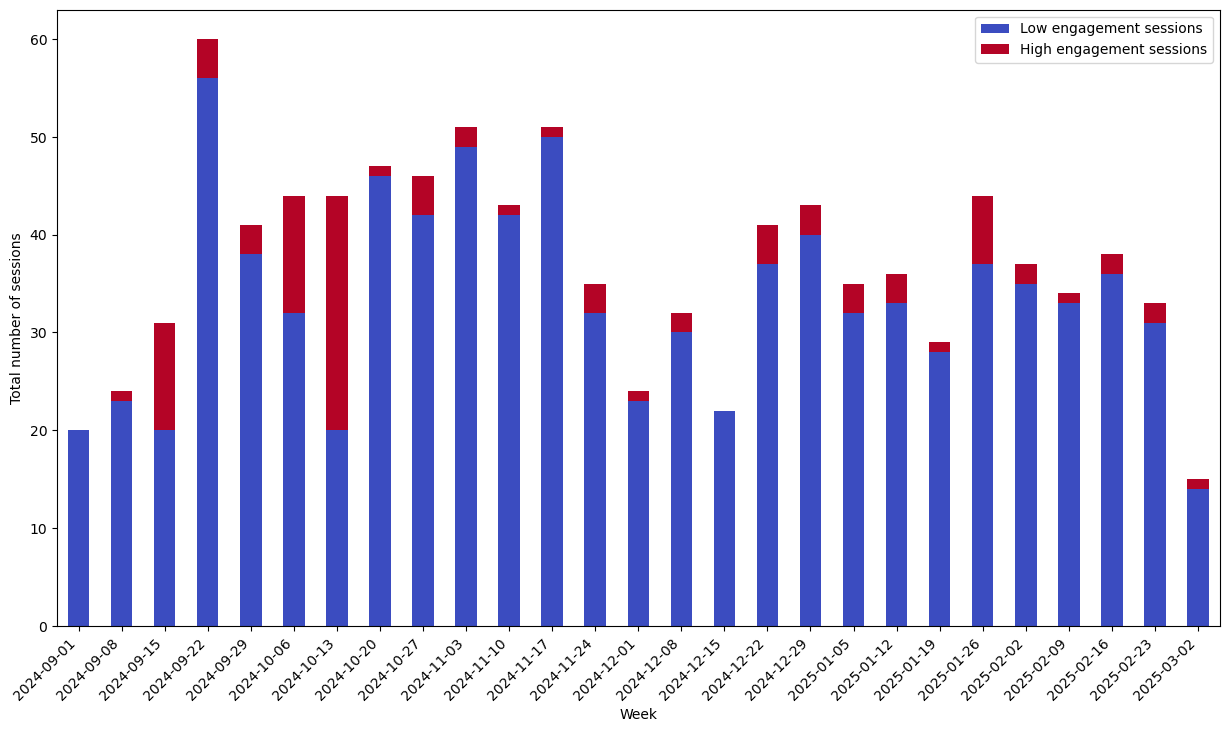

In [125]:
# Define bins and labels
bins = [0, 0.005, 1]
labels = ['Low engagement sessions', 'High engagement sessions']

# Categorize values in each column
binned_data = weekly_df_t.apply(lambda x: pd.cut(x, bins=bins, labels=labels))

# Count the number of values in each bin for each column
binned_counts = binned_data.apply(lambda x: x.value_counts())

# Create the stacked bar chart
ax = binned_counts.T.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='coolwarm')

#plt.title('Stacked Bar Chart of Binned CPU Usage Distribution')
plt.xlabel('Week')
plt.ylabel('Total number of sessions')

new_labels = weekly_df.index.strftime('%Y-%m-%d')
ax.set_xticks(np.arange(len(new_labels)))
ax.set_xticklabels(new_labels, rotation=45, ha='right')

#plt.legend(title='Bins')

plt.show()